I only work on amenities in this notebook to come up with the best strategy to see how they affect price
Carolyn Massa:  Capstone 2 
This is NOTEBOOK 1_a

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
Listing_2019_04 = pd.read_csv('listings_details_2019_04.csv',low_memory=False) # Here I import my cleaned data set from my primary notebook

In [18]:
Listing_2019_04['amenities'].value_counts()


{}                                                                                                                                                                                                                                                                                                                                                 185
{TV,"Cable TV",Wifi,Kitchen,Heating,"Family/kid friendly",Washer,"Smoke detector",Hangers,"Hair dryer",Iron,"Laptop friendly workspace"}                                                                                                                                                                                                            53
{TV,Wifi,Kitchen,Heating,Washer,"Smoke detector",Essentials,Shampoo,Hangers,"Hair dryer",Iron}                                                                                                                                                                                                                            

In [19]:
Listing_2019_04.groupby(by='amenities').count()[['id']].sort_values(by='id', ascending=False).head(10)

,id
amenities,
{},185
"{TV,""Cable TV"",Wifi,Kitchen,Heating,""Family/kid friendly"",Washer,""Smoke detector"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}",53
"{TV,Wifi,Kitchen,Heating,Washer,""Smoke detector"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron}",36
"{Internet,Wifi,Kitchen,Heating,Essentials}",33
"{Internet,Wifi,Kitchen,Heating,Washer,Essentials}",30
"{TV,Internet,Wifi,Kitchen,Heating,Washer,Essentials}",26
"{TV,Wifi,Kitchen,Heating,Washer,""Smoke detector"",""Carbon monoxide detector"",Essentials,Shampoo,Hangers,""Laptop friendly workspace"",""Self check-in"",Lockbox,""Private living room"",""Hot water"",""Bed linens"",""Coffee maker"",Refrigerator,Dishwasher,""Dishes and silverware"",Oven}",23
"{Wifi,Kitchen,Heating,Washer,""Smoke detector"",""Carbon monoxide detector"",Essentials,Shampoo,Hangers,""Laptop friendly workspace"",""Self check-in"",Lockbox,""Private living room"",""Hot water"",""Bed linens"",Refrigerator,""Dishes and silverware"",Oven}",23
"{TV,Wifi,Kitchen,Elevator,Heating,Washer,""Smoke detector"",""Carbon monoxide detector"",Essentials,Shampoo,Hangers,""Laptop friendly workspace"",""Self check-in"",Lockbox,""Private living room"",""Hot water"",""Bed linens"",Refrigerator,""Dishes and silverware"",Oven}",23


In [20]:
Listing_2019_04['amenities'].describe()

count     58184
unique    51460
top          {}
freq        185
Name: amenities, dtype: object

Here I scan my uncleaned listing detailed list to take a fresh approach to my EDA

In [21]:
amenities_Review = pd.read_csv('listings_details_2019_04.csv', low_memory=False)

In [22]:
amenities_Review['price'] = amenities_Review['price'].str.replace(',', '')
amenities_Review['price'] = amenities_Review['price'].str.replace('$', '')
amenities_Review['price'] = amenities_Review['price'].astype(float)
amenities_Review['price'].describe()

count    58184.000000
mean       115.449230
std        164.347064
min          0.000000
25%         59.000000
50%         80.000000
75%        120.000000
max       9379.000000
Name: price, dtype: float64

In [23]:
amenities_Review.amenities = amenities_Review.amenities.str.replace("[{}]", "").str.replace('"', "")
amenities_Review['amenities'].head(20)

0     TV,Cable TV,Internet,Wifi,Kitchen,Buzzer/wirel...
1     TV,Internet,Wifi,Kitchen,Heating,Washer,Dryer,...
2     Internet,Wifi,Kitchen,Paid parking off premise...
3     TV,Cable TV,Internet,Wifi,Kitchen,Heating,Wash...
4     TV,Cable TV,Internet,Wifi,Kitchen,Paid parking...
5     Internet,Wifi,Kitchen,Washer / Dryer,Elevator,...
6     Internet,Wifi,Kitchen,Elevator,Heating,Essenti...
7     TV,Internet,Wifi,Kitchen,Paid parking off prem...
8     TV,Cable TV,Internet,Wifi,Kitchen,Elevator,Buz...
9     TV,Cable TV,Internet,Wifi,Kitchen,Heating,Wash...
10    TV,Cable TV,Internet,Wifi,Kitchen,Paid parking...
11    TV,Cable TV,Internet,Wifi,Kitchen,Paid parking...
12    TV,Internet,Wifi,Kitchen,Smoking allowed,Pets ...
13    TV,Cable TV,Internet,Wifi,Kitchen,Paid parking...
14               Cable TV,Internet,Wifi,Kitchen,Heating
15    TV,Cable TV,Internet,Wifi,Kitchen,Paid parking...
16    TV,Cable TV,Internet,Wifi,Kitchen,Buzzer/wirel...
17    TV,Internet,Wifi,Kitchen,Breakfast,Elevato

In [24]:
#I run a lambda to split each amenity at the , in each grouping then determine the Top 20 most frequent

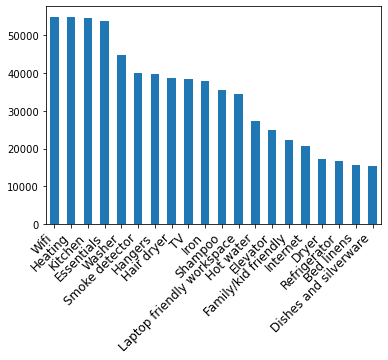

In [25]:
import pickle
sample_Top_20_AMNS = pd.Series(np.concatenate(amenities_Review['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

pickle_out = open("sample_Top_20_AMNS_Pickle", "wb")
pickle.dump(sample_Top_20_AMNS, pickle_out)
pickle_out.close()




In [26]:
#20 Least Frequent Amenities

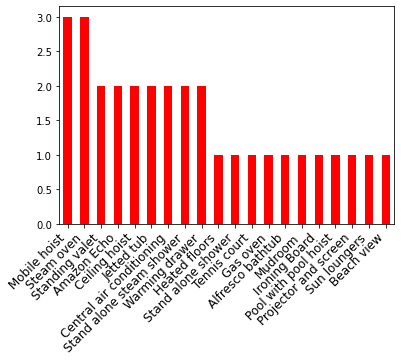

In [27]:
import pickle
sample_Bottom_20_AMNS = pd.Series(np.concatenate(amenities_Review['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().tail(20)\
    .plot(kind='bar', color='red')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();


Let's look what amenities the top 20 priced had

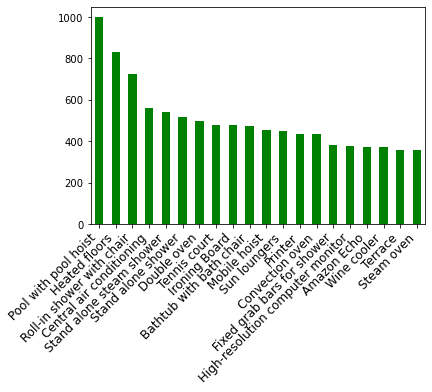

In [28]:
AMNS_HIGH_PRICE = amenities = np.unique(np.concatenate(amenities_Review['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, amenities_Review[amenities_Review['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])
amenity_srs.sort_values(ascending=False)[:20].plot(kind='bar', color='green')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

pickle_out = open("AMNS_HIGH_PRICE_Pickle", "wb")
pickle.dump(AMNS_HIGH_PRICE, pickle_out)
pickle_out.close()

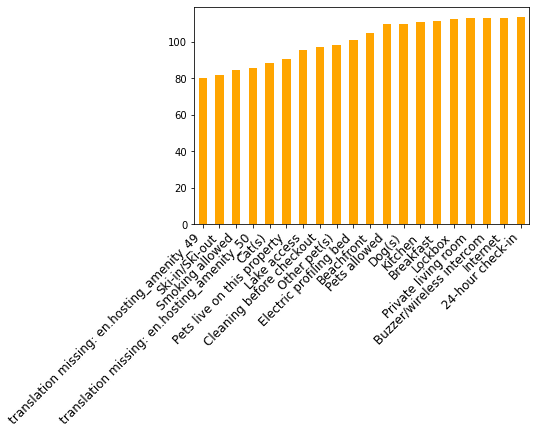

In [29]:
import pickle

AMNS_LOW_PRICE = amenities = np.unique(np.concatenate(amenities_Review['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, amenities_Review[amenities_Review['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])
amenity_srs.sort_values(ascending=True)[:20].plot(kind='bar',color='orange')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();



In [ ]:
Listing_2019_04

In [31]:
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Internet|WiFi'), 'wifi'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Heating'), 'heating'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Washer|Dryer'), 'washer_dryer'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Kitchen'|'Dishes and silverware'|'Kitchen Essentials'), 'kitchen_items'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Shampoo'), 'Toiletries'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Hangers'), 'hangers'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Laptop friendly'), 'laptop space'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Family/kid friendly'), 'family_friendly'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Smoke detector'), 'fire protection'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Refrigerator'), 'refrigerator'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Elevator'), 'elevator'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Bed linens'), 'bed linens'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Elevator'), 'elevator'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_maker'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Hot water'), 'hot_water'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('TV'), 'tv'] = 1
Listing_2019_04.loc[Listing_2019_04['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1

TypeError: unsupported operand type(s) for |: 'str' and 'str'

In [32]:
amenities_Review.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [36]:
amenities_Review.amenities.value_counts()

                                                                                                                                                                                                                                                                                                                                                                                            185
TV,Cable TV,Wifi,Kitchen,Heating,Family/kid friendly,Washer,Smoke detector,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                                                                                                 53
TV,Wifi,Kitchen,Heating,Washer,Smoke detector,Essentials,Shampoo,Hangers,Hair dryer,Iron                                                                                                                                                

In [34]:
amenities_Review.amenities[:50].values

array(['TV,Cable TV,Internet,Wifi,Kitchen,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Essentials',
       'TV,Internet,Wifi,Kitchen,Heating,Washer,Dryer,Essentials,Hangers,Iron,Laptop friendly workspace,Hot water,Host greets you',
       'Internet,Wifi,Kitchen,Paid parking off premises,Family/kid friendly,Washer,Smoke detector,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self check-in,Smart lock,Children’s books and toys,Hot water,Luggage dropoff allowed',
       'TV,Cable TV,Internet,Wifi,Kitchen,Heating,Washer,Smoke detector,Fire extinguisher,Essentials,Shampoo,Hangers,Hair dryer,Laptop friendly workspace,Hot water,Bed linens,Extra pillows and blankets,Long term stays allowed,Host greets you',
       'TV,Cable TV,Internet,Wifi,Kitchen,Paid parking off premises,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Hot water,Host greets you